In [1]:
import pandas as pd
import numpy as np

file_name_task = 'En_In.xls'

df = pd.read_excel(file_name_task, skiprows=17, usecols="C:F",
                       names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'])

print(df.head(12))

                Country Energy Supply Energy Supply per Capita  % Renewable
0           Afghanistan           321                       10    78.669280
1               Albania           102                       35   100.000000
2               Algeria          1959                       51     0.551010
3        American Samoa           ...                      ...     0.641026
4               Andorra             9                      121    88.695650
5                Angola           642                       27    70.909090
6              Anguilla             2                      136     0.000000
7   Antigua and Barbuda             8                       84     0.000000
8             Argentina          3378                       79    24.064520
9               Armenia           143                       48    28.236060
10                Aruba            12                      120    14.870690
11           Australia1          5386                      231    11.810810


In [2]:
df['Energy Supply'] = pd.to_numeric(df['Energy Supply'], errors='coerce') * 10**6

df.replace("...", np.nan, inplace=True)

df.replace([np.inf, -np.inf], np.nan, inplace=True)

print(df.head(12))

                Country  Energy Supply  Energy Supply per Capita  % Renewable
0           Afghanistan   3.210000e+08                      10.0    78.669280
1               Albania   1.020000e+08                      35.0   100.000000
2               Algeria   1.959000e+09                      51.0     0.551010
3        American Samoa            NaN                       NaN     0.641026
4               Andorra   9.000000e+06                     121.0    88.695650
5                Angola   6.420000e+08                      27.0    70.909090
6              Anguilla   2.000000e+06                     136.0     0.000000
7   Antigua and Barbuda   8.000000e+06                      84.0     0.000000
8             Argentina   3.378000e+09                      79.0    24.064520
9               Armenia   1.430000e+08                      48.0    28.236060
10                Aruba   1.200000e+07                     120.0    14.870690
11           Australia1   5.386000e+09                     231.0

In [3]:
import pandas as pd

df['Country'] = df['Country'].replace({
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
})

df['Country'] = df['Country'].str.replace(r"\(.*\)", "", regex=True).str.replace(r"\d+", "", regex=True).str.strip()

df['% Renewable'] = df['% Renewable'].round(3)

In [4]:
import re

df['Country'] = df['Country'].str.replace(r'\s*\(.*?\)|\d+', '', regex=True)

df.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669
1,Albania,1.020000e+08,35.0,100.000
2,Algeria,1.959000e+09,51.0,0.551
3,American Samoa,NaN,NaN,0.641
4,Andorra,9.000000e+06,121.0,88.696


In [5]:
df.loc[df['Country'].isin(['American Samoa', 'South Korea', 'Bolivia' ])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,NaN,0.641
24,Bolivia,3.360000e+08,32.0,31.477
164,South Korea,1.100700e+10,221.0,2.279


In [6]:
GPD = pd.read_csv('gpd.csv', skiprows=4)

GPD['Country Name'] = GPD['Country Name'].replace({
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
})

pd.set_option('display.max_columns', 15)

In [7]:
GPD.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,...,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,...,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN


In [8]:
file_name_task_second = pd.read_excel('scimagojr.xlsx')

file_name_task_second.head(12)

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
5,6,Canada,17899,17620,215003,40930,12.01,149
6,7,Germany,17027,16831,140566,27426,8.26,126
7,8,India,15005,14841,128763,37209,8.58,115
8,9,France,13153,12973,130632,28601,9.93,114
9,10,South Korea,11983,11923,114675,22595,9.57,104


In [9]:
file_name_task_second = file_name_task_second[file_name_task_second['Rank'] <= 15]

merged_data = pd.merge(file_name_task_second, df, how='inner', left_on='Country', right_on='Country')
final_data = pd.merge(merged_data, GPD, how='inner', left_on='Country', right_on='Country Name')

columns_needed = ['Country', 'Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
                  'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'] + [str(year) for year in range(2006, 2016)]
Result = final_data[columns_needed]

Result = Result[Result['Rank'] <= 15]
Result.set_index('Country', inplace=True)

In [10]:
Result.head(3)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,...,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,...,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
Japan,3,30504,30287,223024,61554,7.31,134,...,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,...,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12


In [11]:
Result.shape

(13, 20)

In [12]:
def average_gdp_for_10_years():
    gdp_columns = [str(year) for year in range(2006, 2016)]
    
    average_gdp = Result[gdp_columns].mean(axis=1)
    
    return average_gdp.sort_values(ascending=False)

average_gdp_for_10_years()

Country
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

In [13]:
def gdp_change_for_5th_country():
    average_gdp = average_gdp_for_10_years()
    
    fifth_country = average_gdp.index[4]
    
    gdp_change = Result.loc[fifth_country, '2015'] - Result.loc[fifth_country, '2006']
    
    return (fifth_country, gdp_change)

gdp_change_for_5th_country()

('Brazil', 474343725980.5698)

In [14]:
def max_renewable_energy():
    
    max_renewable = Result['% Renewable'].idxmax()
    max_value = Result['% Renewable'].max()
    
    return (max_renewable, f"{max_value:.5f}")
max_renewable_energy()

('Brazil', '69.64800')

In [15]:
def population_by_energy():
    Result['Estimated Population'] = Result['Energy Supply'] / Result['Energy Supply per Capita']
    
    population_country = Result['Estimated Population'].sort_values(ascending=False).index[5]
    population_value = Result['Estimated Population'].sort_values(ascending=False).iloc[5]
    
    return (population_country, population_value)

population_by_energy()

('Germany', 80369696.96969697)

In [16]:
def count_of_cited_documents():
    Result['Citations per Capita'] = Result['Citations'] / Result['Estimated Population']
    
    data_clean = Result[['Citations per Capita', 'Energy Supply per Capita']].dropna()
    
    correlation = data_clean['Citations per Capita'].corr(data_clean['Energy Supply per Capita'])
    
    return correlation

count_of_cited_documents()

0.7485600772321214

In [17]:
def task_thirteen():
    renewable_median = Result['% Renewable'].median()
    
    Result['Renewable Above Median'] = (Result['% Renewable'] >=
                                        renewable_median).astype(int)
    
    return Result[['Renewable Above Median', 'Rank']].sort_values(by='Rank')['Renewable Above Median']

task_thirteen()

Country
China                 1
Japan                 0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                0
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Renewable Above Median, dtype: int32

In [18]:
def task_fourteen():
    ContinentDict = {
        'China':'Asia', 'United States':'North America', 'Japan':'Asia',
        'United Kingdom':'Europe', 'Russian Federation':'Europe',
        'Canada':'North America', 'Germany':'Europe', 'India':'Asia',
        'France':'Europe', 'South Korea':'Asia', 'Italy':'Europe',
        'Spain':'Europe', 'Iran':'Asia', 'Australia':'Australia', 'Brazil':'South America'
    }

    Result['Continent'] = Result.index.to_series().map(ContinentDict)
    result = Result.groupby('Continent')['Estimated Population'].agg(['size', 'sum', 'mean', 'std'])
    
    return result

task_fourteen()

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,5,3.940587e+08,7.881174e+07,3.813228e+07
North America,1,3.523986e+07,3.523986e+07,NaN
South America,1,2.059153e+08,2.059153e+08,NaN


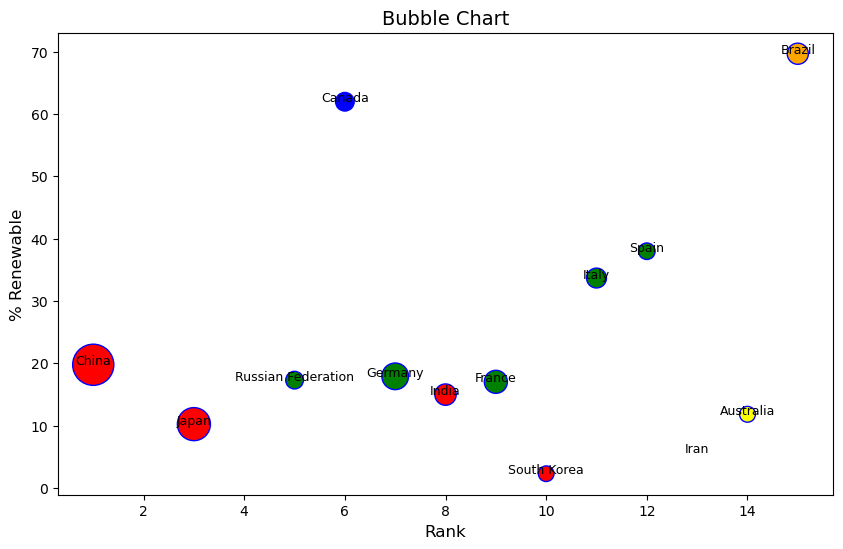

In [22]:
import matplotlib.pyplot as plt

def plot_bubble_chart():
    continent_colors = {
        'Asia': 'red',
        'Europe': 'green',
        'North America': 'blue',
        'South America': 'orange',
        'Australia': 'yellow'
    }

    Result['Color'] = Result['Continent'].map(continent_colors)

    plt.figure(figsize=(10, 6))

    plt.scatter(
        Result['Rank'],
        Result['% Renewable'], 
        s=Result['2015'] / 1e10, 
        c=Result['Color'], 
        alpha=1,  
        edgecolors="b", 
        linewidth=1  
    )

    for index, row in Result.iterrows():
        plt.text(row['Rank'], row['% Renewable'], index, fontsize=9, ha='center')

    plt.title('Bubble Chart', fontsize=14)
    plt.xlabel('Rank', fontsize=12)
    plt.ylabel('% Renewable', fontsize=12)

    plt.show()

plot_bubble_chart()
